## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
md = pd.merge(mouse_metadata,study_results,on="Mouse ID" )
# Display the data table for preview
md.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0.0,45.000000,0
1,k403,Ramicane,Male,21,16,5.0,46.016006,0
2,k403,Ramicane,Male,21,16,10.0,47.972927,1
3,k403,Ramicane,Male,21,16,15.0,49.159749,3
4,k403,Ramicane,Male,21,16,20.0,58.965720,1


In [2]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pltData = cmd[["Mouse ID","Drug Regimen"]]
cmd = md.drop_duplicates(subset=["Mouse ID","Timepoint"])


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cmd = md.drop_duplicates(subset=["Mouse ID","Timepoint"])


In [ ]:
# Checking the number of mice in the clean DataFrame.
mouse = cmd["Mouse ID"].unique()
len(mouse)

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
groupStats = cmd.groupby(["Drug Regimen", "Timepoint"])
meanTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].mean())
meanTumor.reset_index(inplace = True);
meanTumor.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [ ]:
#SEM
semTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].sem())
#Median
medTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].median())
#Variance
varTumor =  pd.DataFrame(groupStats['Tumor Volume (mm3)'].var())
#Standard Deviatopm
sdTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].std())
#merge
mergedData = pd.merge(meanTumor,semTumor,on=["Drug Regimen","Timepoint"])
mergedData.columns = ["Drug Regimen","Timepoint","Mean Tumor Volume (mm3)","SEM Tumor Volume (mm3)"]
mergedData = pd.merge(mergedData,medTumor,on=["Drug Regimen","Timepoint"])
mergedData = pd.merge(mergedData,varTumor,on=["Drug Regimen","Timepoint"])
mergedData = pd.merge(mergedData,sdTumor,on=["Drug Regimen","Timepoint"])
mergedData.columns = ["Drug Regimen","Timepoint","Mean Tumor Volume(TV) (mm3)","SEM TV (mm3)","Median TV (mm3)" ,"Var TV (mm3)" ,"Std Dev TV (mm3)" ]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mergedData.head()

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

semTumor = groupStats.agg({"Tumor Volume (mm3)": ["mean","sem","median","var","std"] })
semTumor.head()


## Bar and Pie Charts

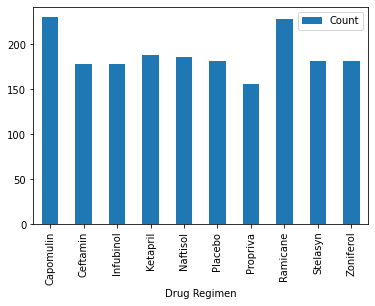

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

bdf = pltData.groupby(["Drug Regimen"])

bdfStats = pd.DataFrame(bdf["Drug Regimen"].count())
bdfStats.columns = ["Count"]
bdfStats.plot.bar()

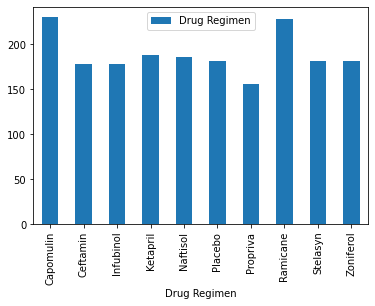

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bdfStats = pd.DataFrame(bdf["Drug Regimen"].count()).plot(kind='bar')
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
